<style type="text/css">
table td{
border:none;
}
</style>

<table>
    <tr>
        <td width=15%><img src="../img/logoIGE_Color_Light.jpg"></img></td>
        <td>
            <center>
                <h1>Machine Learning for prediciting RX localization</h1> <br>
                May - July 2022 <br>
                IGE internship
            </center>
            Renan MANCEAUX <br>
            Supervisor :<br>
            Thomas CHAUVE
        </td>
        <td width=20%><img src="../img/logo_UGA_imag.png"></img></td>
    </tr>
</table>

<center><h1> Exploration : Dimensional reduction </h1></center>

--------------------

# t-distribued Stochastic Neighbor Embleding (t-SNE) on TJ dataset

Exploration process before apply machine learning on craft data. Not-linear reduction of dimensions calculating similarities with Student-distribued probabilities to project individuals into 2 dimensional space, keeping smallest distances within neighbors. 

### import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray
import sklearn
import plotly.express as px

import sys
sys.path.append("../")
import utils

from sklearn.manifold import TSNE

### Loading data

In [3]:
TJ_CI02 = utils.load_tj_data("../data/TJ/TJ_CI02.npy").dropna()
TJ_CI04 = utils.load_tj_data("../data/TJ/TJ_CI04.npy").dropna()
TJ_CI06 = utils.load_tj_data("../data/TJ/TJ_CI06.npy").dropna()
TJ_CI09 = utils.load_tj_data("../data/TJ/TJ_CI09.npy").dropna()
TJ_CI21 = utils.load_tj_data("../data/TJ/TJ_CI21.npy").dropna()

TJ_CI02['batch'] = ['CI02'] * np.shape(TJ_CI02)[0]
TJ_CI04['batch'] = ['CI04'] * np.shape(TJ_CI04)[0]
TJ_CI06['batch'] = ['CI06'] * np.shape(TJ_CI06)[0]
TJ_CI09['batch'] = ['CI09'] * np.shape(TJ_CI09)[0]
TJ_CI21['batch'] = ['CI21'] * np.shape(TJ_CI21)[0]

data = pd.concat((TJ_CI02,TJ_CI04,TJ_CI06,TJ_CI09,TJ_CI21))

## t-SNE on CI02 geom and craft data

### Variables selection

In [4]:
data['RX'] = data['RX'].astype(object)
data['batch'] = data['batch'].astype(object)
X = data.loc[:,((data.columns != 'RX')&(data.columns != 'batch'))] 
y = data['RX']
b = data['batch'] 

### Normalization

In [5]:
norm_X = (X - X.mean())/X.std()

### Apply t-SNE for class

In [25]:
tsne = TSNE(n_components=2,perplexity=10,n_iter=2000, learning_rate='auto',init='random',verbose=1)
res_tsne  = tsne.fit_transform(norm_X)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 722 samples in 0.000s...
[t-SNE] Computed neighbors for 722 samples in 0.173s...
[t-SNE] Computed conditional probabilities for sample 722 / 722
[t-SNE] Mean sigma: 1.125031
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.896683
[t-SNE] KL divergence after 2000 iterations: 1.319073


### Projection of individuals on 2 dimensional space with labeling for pixel status

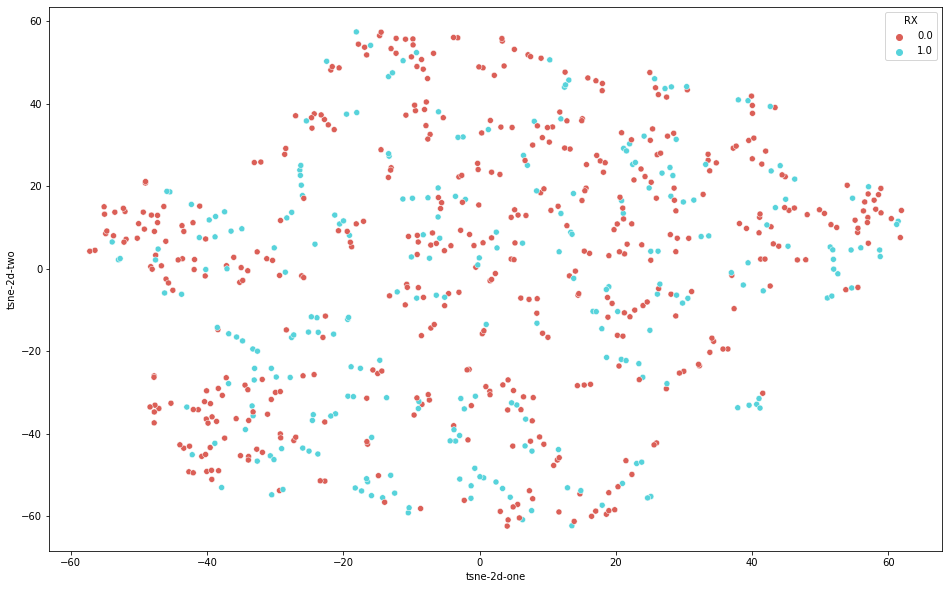

In [26]:
import seaborn as sns

data['tsne-2d-one'] = res_tsne[:,0]
data['tsne-2d-two'] = res_tsne[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="RX",
    palette=sns.color_palette("hls", 2),
    data=data,
    legend="full",
    alpha=1
)
plt.show()

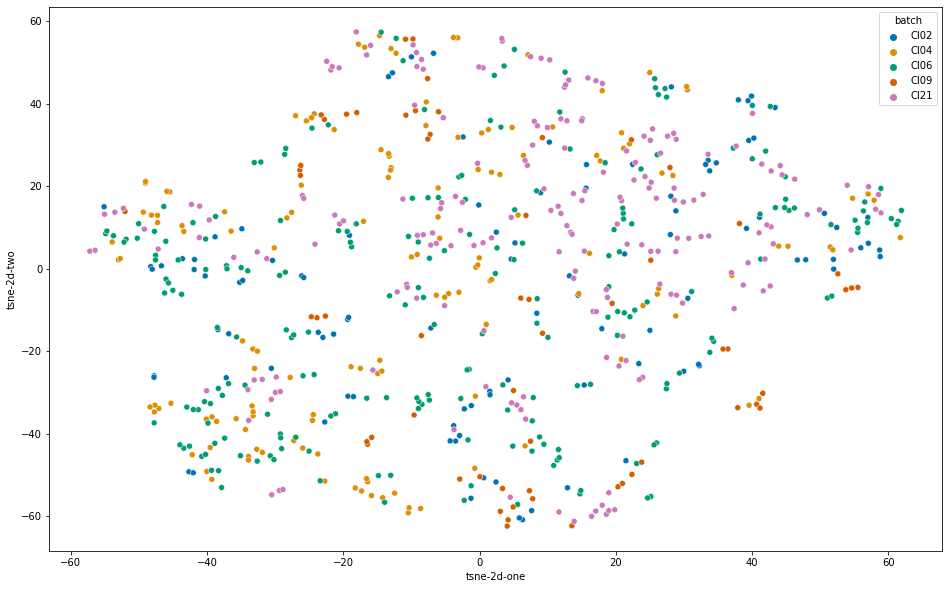

In [28]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="batch",
    palette=sns.color_palette("colorblind", 5),
    data=data,
    legend="full",
    alpha=1
)
plt.show()